# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install libraries

In [ ]:
# Import required libraries

# Import Libraries

In [ ]:
#Load the required libraries

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import joblib


# import prophet
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly
# from prophet.plot import add_changepoints_to_plot

# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# import xgboost as xgb
# from xgboost import plot_importance, plot_tree

# import tensorflow as tf
# from keras.models import Sequential,load_model
# from keras.layers import Dropout, Dense, LSTM, GRU
# from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


from pylab import rcParams
rcParams['figure.figsize'] = 14, 8


# from matplotlib import rc

# sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)

# Import Data

In [ ]:
data_BTC = pd.read_csv("data/bitcoin.csv")

In [ ]:
data_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


Here's a breakdown of each feature:

- **open_time**: This represents the opening time of a specific period in Unix time format. Unix time is a way to represent time as the number of seconds that have elapsed since January 1, 1970.

- **open**: This refers to the opening price of the trading instrument at the given period.

- **high**: This represents the highest price reached by the trading instrument during the specified period.

- **low**: This denotes the lowest price reached by the trading instrument during the specified period.

- **close**: This indicates the closing price of the trading instrument at the given period.

- **volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.

- **close_time**: This represents the closing time of the specific period in Unix time format.

- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.

- **count**: This represents the number of trades that occurred during the specified period.

- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.

- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

In [ ]:
# Renaming the columns to match the name in the previous notebook with bitstamp data so that I do not have to change the whole code
data_BTC.rename(columns = {'open_time':'date', 'volume':'Volume'}, inplace = True)

In [ ]:
data_BTC.head()

,date,open,high,low,close,Volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [ ]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   Volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
# Removing close time column

data_BTC = data_BTC.drop(columns=['close_time'])

In [ ]:
data_BTC.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,5.216076e+06,5536,368.470786,3.544535e+06


# EDA

## Converting to Datetime

In [ ]:
# Converting the Date column from object to datetime
data_BTC[["date"]] = data_BTC[["date"]].apply(pd.to_datetime)

In [ ]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   Volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


## Missing Data

In [ ]:
data_BTC.isnull().any()

date                      False
open                      False
high                      False
low                       False
close                     False
Volume                    False
quote_volume              False
count                     False
taker_buy_volume          False
taker_buy_quote_volume    False
dtype: bool

# Modeling

In [ ]:
data_BTC.shape

(32821, 10)

In [ ]:
# Train/Test Split

split_date = "2022-09-01"

train_split = data_BTC['date'] <= split_date
test_split = data_BTC['date'] > split_date

train_rf = data_BTC[train_split]
test_rf = data_BTC[test_split]

columns = ['open', 'high', 'low', 'Volume', 'quote_volume', 'taker_buy_volume', 'taker_buy_quote_volume']

X_train, y_train = train_rf[columns], train_rf.close
X_test, y_test = test_rf[columns], test_rf.close

In [ ]:
### GridSearchCV

# Parameters
num_estimators = [120, 130]
learn_rates = [0.07, 0.06]
max_depths = [4, 3]
min_samples_leaf = [1,2]

# Model
regressor = GradientBoostingRegressor(loss='huber')


# Param Grid
param_grid = {
              'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              }

# Model Fit
grid_search = GridSearchCV(
                           regressor,
                           param_grid,
                           cv=5,
                           )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
             param_grid={'learning_rate': [0.07, 0.06], 'max_depth': [4, 3],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [120, 130]})

In [ ]:
print(f"Model Best Score : {grid_search.best_score_}")
print(f"Model Best Estimator : {grid_search.best_estimator_}")
print(f"Model Best Parameters : {grid_search.best_params_}")

Model Best Score : 0.968997154939564
Model Best Estimator : GradientBoostingRegressor(learning_rate=0.06, loss='huber', n_estimators=130)
Model Best Parameters : {'learning_rate': 0.06, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 130}


In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
# best_rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/BTC/grb_btc.pkl")

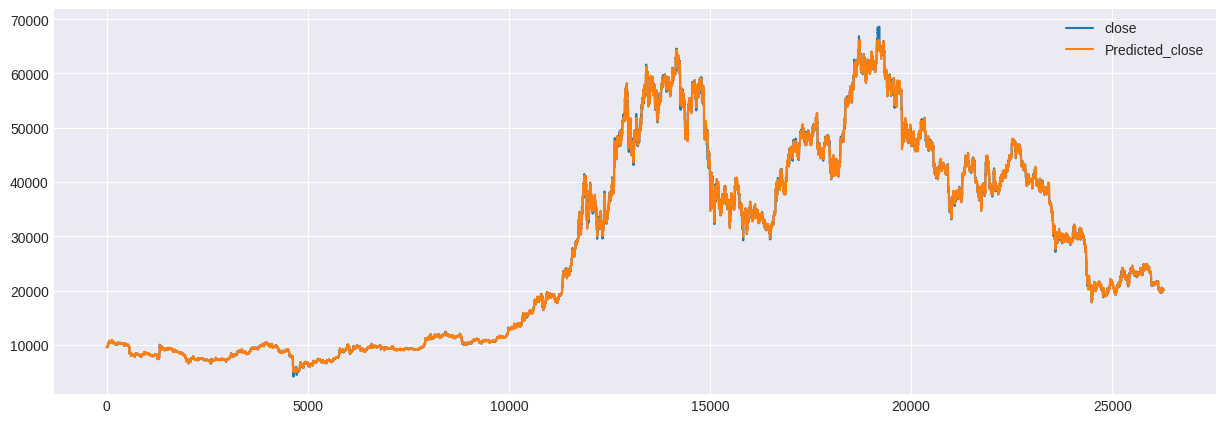

In [ ]:
# Plot Actual vs Prediction

train_rf = train_rf.copy() # This avoids a warning

train_rf['Predicted_close'] = best_rf_model.predict(X_train)

train_rf[['close','Predicted_close']].plot(figsize=(15, 5));

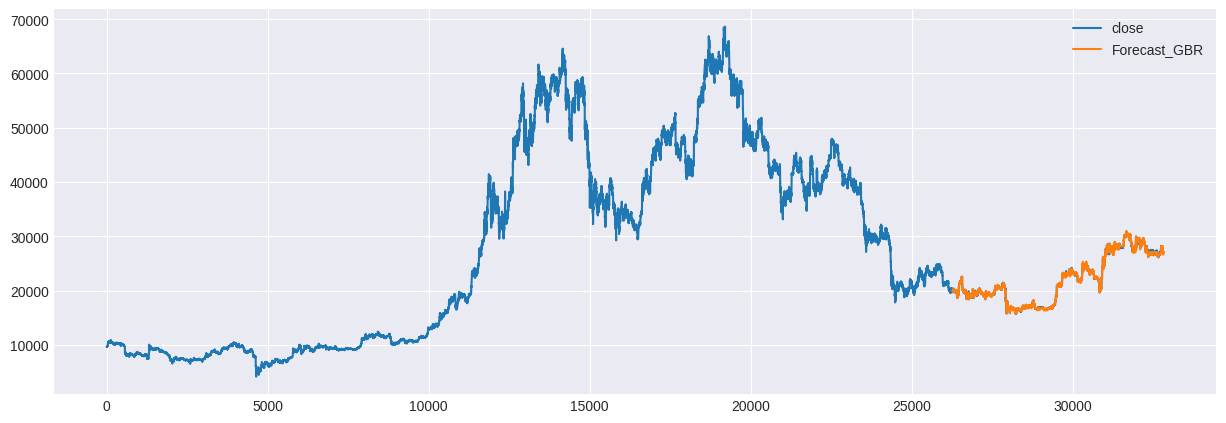

In [ ]:
test_rf = test_rf.copy() # This avoids a warning

test_rf['Forecast_GBR'] = best_rf_model.predict(X_test)

overall_data = pd.concat([train_rf, test_rf], sort=False)

# Plot whole timeframe

overall_data[['close', 'Forecast_GBR']].plot(figsize=(15, 5));

In [ ]:
#save your model or results

joblib.dump(best_rf_model, "/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/BTC/gbr_btc.pkl")

['/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/BTC/gbr_btc.pkl']

In [ ]:
#load your model for further usage

# best_rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/ETH/gbr_btc.pkl")

In [ ]:
# Results GBR Model

test_mae_rf = round(mean_absolute_error(test_rf['close'], test_rf['Forecast_GBR']))
test_rmse_rf = round(np.sqrt(mean_squared_error(test_rf['close'], test_rf['Forecast_GBR'])))
test_r2_rf = r2_score(test_rf['close'], test_rf['Forecast_GBR'])

print(f"test MAE GBR : {test_mae_rf}")
print(f"test RMSE GBR : {test_rmse_rf}")
print(f"test R2 GBR : {test_r2_rf}")

test MAE GBR : 107
test RMSE GBR : 148
test R2 GBR : 0.9988219285793174


## Results Modeling

In [ ]:
# Overall Results

results = {
    "METRIC": ["MAE", "RMSE", "R2"],
    "GradientBoostingRegressor": [test_mae_rf, test_rmse_rf, test_r2_rf]
}


df_results = pd.DataFrame(results).round(1)
df_results

,METRIC,GradientBoostingRegressor
0,MAE,107.0
1,RMSE,148.0
2,R2,1.0
